In [ ]:
!pip install unidecode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from collections import Counter
from tabulate import tabulate
from unidecode import unidecode
from math import ceil
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Gestão de Tempo Universitário (respostas).xlsx')

In [ ]:
dados

,data,nome,faixa_etaria,genero,mais_de_uma_faculdade,universidade,curso,curso_tratado,n_cadeiras,trabalha,t_jornada,t_deslocamento,semestres_faltantes,metodo_organizacao,satisfacao,desejo,dificuldade
0,2024-04-05 13:44:20.544,Andréia,21-24 anos,Feminino,Não,UFCSPA,Informática Biomédica,informática biomédica,4,Sim,6 horas,2h ou mais,2,Não organizo,3,"Descanso, Desenvolvimento pessoal, Estudos, Fa...","Faculdade, Trabalho"
1,2024-04-05 13:44:57.696,Leonardo Fiori Menegol,21-24 anos,Masculino,Não,UFCSPA,Informática Biomédica,informática biomédica,8,Sim,6 horas,1h - 2h,4,Aplicativo,4,"Descanso, Desenvolvimento pessoal, Estudos, Saúde","Desorganização, Faculdade, Obrigações familiares"
2,2024-04-05 13:46:01.632,Joao Vitor,21-24 anos,Masculino,Não,UFCSPA,Informática biomédica,informática biomédica,8,Sim,6 horas,Menos de 30min,3 / 4,Aplicativo,1,"Descanso, Desenvolvimento pessoal, Estudos, Fa...","Faculdade, Saúde mental, Procrastinação"
3,2024-04-05 13:46:15.456,Fellype,21-24 anos,Masculino,Não,Unisinos,Gestão Comercial,gestão comercial,5,Sim,8 horas,Menos de 30min,3,Não organizo,2,"Descanso, Família, Lazer","Desorganização, Faculdade, Procrastinação"
4,2024-04-05 13:46:44.832,Myriam Eduarda Bittencourt Strzalkowski,21-24 anos,Feminino,Não,UFRGS,Enfermagem,enfermagem,5 cadeiras,Não,NaN,1h - 2h,6 semestres,Agenda/planner físico(a),2,"Descanso, Desenvolvimento pessoal, Estudos","Faculdade, Saúde mental, Procrastinação"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2024-04-11 09:19:11.712,Maria Eduarda Brum Martins,17-20 anos,Feminino,Não,UFCSPA,Fisioterapia,fisioterapia,9,Não,NaN,30min -1h,6,Aplicativo,2,"Desenvolvimento pessoal, Lazer, Saúde","Desorganização, Faculdade, Obrigações familiar..."
98,2024-04-11 10:16:19.200,Lucas de Lima Bica,17-20 anos,Masculino,Sim,Universidade do Algarve,Engenharia de Sistemas e Tecnologias Informáticas,engenharia de sistemas e tecnologias informáticas,6,Sim,5 horas,1h - 2h,4,Não organizo,2,"Descanso, Desenvolvimento pessoal, Estudos, La...","Desorganização, Faculdade, Obrigações familiar..."
99,2024-04-11 17:07:24.672,Jéssica,25-27 anos,Feminino,Sim,UFRGS,Engenharia Química,engenharia química,4,Não,NaN,2h ou mais,6,Agenda/planner físico(a),2,"Descanso, Estudos, Família","Faculdade, Obrigações familiares, Saúde mental..."
100,2024-04-11 17:20:55.968,Bernardo Costa,17-20 anos,Masculino,Não,UFRGS,Engenharia quimica,engenharia quimica,8,Sim,8 horas ou mais,1h - 2h,4,Não organizo,4,"Descanso, Estudos, Saúde","Faculdade, Trabalho"


# Faixa etária

In [ ]:
frequencia_absoluta = dados['faixa_etaria'].value_counts()
frequencia_relativa = (frequencia_absoluta / frequencia_absoluta.sum()).round(2)
tabela_final = pd.DataFrame({
    'Faixa etária': frequencia_absoluta.index,
    'Frequência absoluta': frequencia_absoluta.values,
    'Frequência relativa': frequencia_relativa.values
})

tamanho_amostra = len(dados)
proporcao = frequencia_relativa
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao
intervalo_confianca_inferior = (proporcao - margem_erro).round(2)
intervalo_confianca_superior = (proporcao + margem_erro).round(2)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_final['Intervalo de Confiança'] = intervalo_confianca

print(tabulate(tabela_final, headers='keys', tablefmt='pretty', showindex=False))

+--------------+---------------------+---------------------+------------------------+
| Faixa etária | Frequência absoluta | Frequência relativa | Intervalo de Confiança |
+--------------+---------------------+---------------------+------------------------+
|  17-20 anos  |         48          |        0.47         |      (0.37, 0.57)      |
|  21-24 anos  |         41          |         0.4         |       (0.3, 0.5)       |
|   28+ anos   |          7          |        0.07         |      (0.02, 0.12)      |
|  25-27 anos  |          6          |        0.06         |      (0.01, 0.11)      |
+--------------+---------------------+---------------------+------------------------+


O formulário conta com 102 respostas, que será o valor base para todas as medidas estatísticas dessa avaliação. A faixa etária que mais apareceu na pesquisa foi a de 17-20 anos, totalizando 48 respostas e correspondendo a 47% das respostas. A segunda mais frequente foi a faixa de 21-24 anos, tendo 41 respostas e sendo 40% da amostra. A que menos apareceu foi a de 25-27 anos, porém teve uma diferença de apenas 1 resposta comparando com a de 28+, totalizando 6 e 7 respostas e correspondendo a 0,6% e 0,7%, respectivamente.

Ao considerar o intervalo de confiança de 95%, podemos observar que as estimativas das frequências relativas estão dentro dos intervalos calculados. Isso indica que, com 95% de confiança, as proporções de respostas em cada faixa etária são representativas da população da pesquisa. Essa análise reforça a robustez dos resultados e a validade das conclusões tiradas a partir das respostas coletadas.

# Gênero

In [ ]:
frequencia_absoluta = dados['genero'].value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados['genero'])) * 100
frequencia_relativa_arredondada = frequencia_relativa.round(1)
tabela_frequencia = pd.DataFrame({
    'Gênero': frequencia_absoluta.index,
    'Frequência Absoluta': frequencia_absoluta.values,
    'Frequência Relativa (%)': frequencia_relativa_arredondada.values
})

tamanho_amostra = len(dados)
proporcao = frequencia_relativa / 100
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao * 100
intervalo_confianca_inferior = (frequencia_relativa - margem_erro).round(1)
intervalo_confianca_superior = (frequencia_relativa + margem_erro).round(1)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_frequencia['Intervalo de Confiança'] = intervalo_confianca

print("Tabela de Frequência Absoluta e Relativa para a variável 'Gênero':")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a variável 'Gênero':
+----------------------+---------------------+-------------------------+------------------------+
|        Gênero        | Frequência Absoluta | Frequência Relativa (%) | Intervalo de Confiança |
+----------------------+---------------------+-------------------------+------------------------+
|       Feminino       |         58          |          56.9           |      (47.3, 66.5)      |
|      Masculino       |         40          |          39.2           |      (29.7, 48.7)      |
|     Não-binárie      |          3          |           2.9           |      (-0.3, 6.2)       |
| Prefiro não respoder |          1          |           1.0           |      (-0.9, 2.9)       |
+----------------------+---------------------+-------------------------+------------------------+


Os valores encontrados demonstram um número absoluto maior do gênero feminino, com 58 das respostas. O gênero masculino também foi expressivo, com 40 das respostas. O gênero não-binário e a opção "Prefiro não responder" tiveram poucas respostas, com 3 e 1 respostas, respectivamente.

Em termos percentuais, as respostas fornecidas demonstram que mais da metade das respostas são femininas, representando 56,9% do total. O gênero masculino corresponde a 39,2% das respostas, enquanto o gênero não-binário e a opção "Prefiro não responder" representam 2,9% e 1% das respostas, respectivamente.

Os intervalos de confiança foram calculados para fornecer uma estimativa da variação em torno das proporções amostrais com 95% de confiança, destacando a robustez dos resultados. Eles indicam que as proporções de respostas para cada gênero estão dentro dos intervalos calculados, sugerindo que as estimativas das frequências relativas são representativas da população da pesquisa, com um nível de confiança de 95%. Essa análise fortalece a confiabilidade dos resultados e a validade das conclusões derivadas das respostas coletadas.

# Mais de uma universidade

In [ ]:
frequencia_absoluta = dados['mais_de_uma_faculdade'].value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados['mais_de_uma_faculdade'])) * 100
frequencia_relativa_arredondada = frequencia_relativa.round(1)
tabela_frequencia = pd.DataFrame({
    'Mais de uma faculdade?': frequencia_absoluta.index,
    'Frequência Absoluta': frequencia_absoluta.values,
    'Frequência Relativa (%)': frequencia_relativa_arredondada.values
})

tamanho_amostra = len(dados)
proporcao = frequencia_relativa / 100
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao * 100
intervalo_confianca_inferior = (frequencia_relativa - margem_erro).round(1)
intervalo_confianca_superior = (frequencia_relativa + margem_erro).round(1)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_frequencia['Intervalo de Confiança'] = intervalo_confianca

print("Tabela de Frequência Absoluta e Relativa para a Variável 'mais_de_uma_faculdade':")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'mais_de_uma_faculdade':
+------------------------+---------------------+-------------------------+------------------------+
| Mais de uma faculdade? | Frequência Absoluta | Frequência Relativa (%) | Intervalo de Confiança |
+------------------------+---------------------+-------------------------+------------------------+
|          Não           |         91          |          89.2           |      (83.2, 95.2)      |
|          Sim           |         11          |          10.8           |      (4.8, 16.8)       |
+------------------------+---------------------+-------------------------+------------------------+


Os dados revelam que a maioria das pessoas entrevistadas, representando 89.2% do total, não frequentou mais de uma faculdade. Em contraste, apenas 10.8% das pessoas entrevistadas admitiram ter frequentado mais de uma instituição de ensino superior, optando por uma múltipla formação. Além disso, ao considerar os intervalos de confiança calculados, podemos observar que as estimativas das frequências relativas para ambas as categorias estão dentro dos intervalos calculados. Isso sugere que as proporções amostrais são representativas da população da pesquisa, com um nível de confiança de 95%.

# Universidade(s)

In [ ]:
frequencia_absoluta = dados['universidade'].value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados['universidade'])) * 100
frequencia_relativa_arredondada = frequencia_relativa.round(1)
tabela_frequencia = pd.DataFrame({
    'Universidade': frequencia_absoluta.index,
    'Frequência Absoluta': frequencia_absoluta.values,
    'Frequência Relativa (%)': frequencia_relativa_arredondada.values
})

tamanho_amostra = len(dados)
proporcao = frequencia_relativa / 100
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao * 100
intervalo_confianca_inferior = (frequencia_relativa - margem_erro).round(1)
intervalo_confianca_superior = (frequencia_relativa + margem_erro).round(1)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_frequencia['Intervalo de Confiança'] = intervalo_confianca

print("Tabela de Frequência Absoluta e Relativa para a variável 'Universidade':")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a variável 'Universidade':
+-------------------------------+---------------------+-------------------------+------------------------+
|         Universidade          | Frequência Absoluta | Frequência Relativa (%) | Intervalo de Confiança |
+-------------------------------+---------------------+-------------------------+------------------------+
|             UFRGS             |         37          |          36.3           |      (26.9, 45.6)      |
|            UFCSPA             |         35          |          34.3           |      (25.1, 43.5)      |
|             PUCRS             |         12          |          11.8           |      (5.5, 18.0)       |
|           Unisinos            |          4          |           3.9           |       (0.2, 7.7)       |
|             UFSC              |          2          |           2.0           |      (-0.7, 4.7)       |
|             Senai             |          2          |           2.0  

Os valores absolutos encontrados foram expressivamente maiores entre duas universidades, UFRGS com 37 respostas e UFCSPA com 35 respostas. A PUCRS esteve em 12 respostas. As outras 13 opções registradas tiveram valores absolutos menores do que 5. Em termos percentuais, a UFRGS e a UFCSPA corresponderam a 36,3% e 34,3% das respostas, respectivamente, o que equivale a mais de 70% das respostas obtidas no formulário. A PUCRS esteve em 11.8% das respostas, enquanto o restante das 13 opções não teve uma porcentagem expressiva. Além disso, os intervalos de confiança calculados nos fornecem insights sobre a variabilidade das proporções amostrais, indicando que as estimativas das frequências relativas para cada universidade estão dentro desses intervalos. Isso sugere que as proporções amostrais são representativas da população da pesquisa, com um nível de confiança de 95%.

# Curso(s)

In [ ]:

def preprocess(text):
    text = unidecode(text).lower()
    text = ' '.join(text.split())
    return text

dados['curso_tratado'] = dados['curso_tratado'].apply(preprocess)
dados['curso_tratado'].replace('artes visuais licenciatura', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('direito diurno', 'direito', inplace=True)
dados['curso_tratado'].replace('bacharelado em artes visuais', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('licenciatura em artes visuais', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('artes visuais (bacharelado)', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('artes visuais- licenciatura', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('artes visuais bacharelado', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('artes visuais - licenciatura', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('artes', 'artes visuais', inplace=True)
dados['curso_tratado'].replace('economia', 'ciencias economicas', inplace=True)
dados['curso_tratado'].replace('ciencias juridicas e sociais', 'direito', inplace=True)
dados['curso_tratado'].replace('ciencias da computacao', 'ciencia da computacao', inplace=True)

In [ ]:
frequencia_absoluta = dados['curso_tratado'].value_counts()
frequencia_relativa = (frequencia_absoluta / frequencia_absoluta.sum()).round(2)

tamanho_amostra = len(dados)
proporcao = frequencia_absoluta / tamanho_amostra
z_score = stats.norm.ppf(0.975)  # 95% de confiança
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao
intervalo_confianca_inferior = (proporcao - margem_erro).round(2)
intervalo_confianca_superior = (proporcao + margem_erro).round(2)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_final = pd.DataFrame({
    'Curso tratado': frequencia_absoluta.index,
    'Frequência absoluta': frequencia_absoluta.values,
    'Frequência relativa': frequencia_relativa.values,
    'Intervalo de Confiança': intervalo_confianca
})

print("Tabela de Frequência Absoluta e Relativa para a Variável 'Curso':")
print(tabulate(tabela_final, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'Curso':
+---------------------------------------------------------+---------------------+---------------------+------------------------+
|                      Curso tratado                      | Frequência absoluta | Frequência relativa | Intervalo de Confiança |
+---------------------------------------------------------+---------------------+---------------------+------------------------+
|                      artes visuais                      |         22          |        0.22         |      (0.14, 0.3)       |
|                  informatica biomedica                  |         15          |        0.15         |      (0.08, 0.22)      |
|                        medicina                         |         15          |        0.15         |      (0.08, 0.22)      |
|                         direito                         |         10          |         0.1         |      (0.04, 0.16)      |
|                          moda

Os intervalos de confiança nos fornecem uma ideia da precisão das estimativas das frequências relativas dos cursos. Observamos que os cursos com maiores frequências absolutas, como Artes Visuais, Informática Biomédica e Medicina, têm intervalos de confiança estreitos, indicando uma estimativa mais precisa da verdadeira proporção na população. Por outro lado, cursos com frequências menores, como os que tiveram menos de 5 respostas, apresentam intervalos de confiança mais amplos, refletindo uma maior incerteza nas estimativas. Isso sugere que devemos interpretar com cautela as proporções desses cursos menos representados, dada a maior margem de erro associada às suas estimativas.

# N° de cadeiras

In [ ]:
n_cadeiras = dados['n_cadeiras']
print(dados['n_cadeiras'].dtype)
dados['n_cadeiras'] = pd.to_numeric(dados['n_cadeiras'], errors='coerce')

media = round(float(dados['n_cadeiras'].mean()), 1)
mediana = round(float(dados['n_cadeiras'].median()), 1)
moda = dados['n_cadeiras'].mode()[0]

amplitude = round(float(dados['n_cadeiras'].max() - dados['n_cadeiras'].min()), 1)
desvio_padrao = round(float(dados['n_cadeiras'].std()), 1)
coef_variacao = round(float((desvio_padrao / media) * 100), 1)

graus_liberdade = len(dados['n_cadeiras']) - 1

intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale=desvio_padrao / np.sqrt(len(dados['n_cadeiras'])))

tabela_medidas = pd.DataFrame({
    'Medida Estatística': ['Média', 'Mediana', 'Moda', 'Amplitude', 'Desvio-padrão', 'Coeficiente de Variação', 'Intervalo de confiança'],
    'Valor': [media, mediana, moda, amplitude, desvio_padrao, coef_variacao, intervalo_confianca]
})
print("Tabela de Medidas Estatísticas para a variável 'Número de cadeiras':")
print(tabulate(tabela_medidas, headers='keys', tablefmt='pretty', showindex=False))


object
Tabela de Medidas Estatísticas para a variável 'Número de cadeiras':
+-------------------------+----------------------------------------+
|   Medida Estatística    |                 Valor                  |
+-------------------------+----------------------------------------+
|          Média          |                  6.2                   |
|         Mediana         |                  6.0                   |
|          Moda           |                  7.0                   |
|        Amplitude        |                  10.0                  |
|      Desvio-padrão      |                  2.1                   |
| Coeficiente de Variação |                  33.9                  |
| Intervalo de confiança  | (5.787520860528962, 6.612479139471039) |
+-------------------------+----------------------------------------+


A média do número de cadeiras é de 6,2, enquanto a mediana é de 6,0. A moda é 7,0, o que indica que este é o valor mais frequente entre os respondentes. A amplitude do conjunto de dados é de 10,0, variando de 2 a 12 cadeiras. O desvio-padrão é de 2,1, o que sugere uma dispersão moderada dos dados em relação à média. O coeficiente de variação é de 33,9%, indicando uma variabilidade relativa de aproximadamente 34% em relação à média. A amplitude do intervalo de confiança para a média é de (5.79, 6.61), o que sugere que a verdadeira média do número de cadeiras na população tem uma alta probabilidade de estar dentro desse intervalo. Isso nos dá uma medida da incerteza associada à estimativa da média amostral.

Teste de Hipótese: diferença entre número de cadeiras entre universidades.

In [ ]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

dados['n_cadeiras'] = pd.to_numeric(dados['n_cadeiras'], errors='coerce')
dados = dados.dropna(subset=['n_cadeiras'])
dados_filtrados = dados[dados['universidade'].isin(['UFCSPA', 'UFRGS'])]
descricao_por_universidade = dados_filtrados.groupby('universidade')['n_cadeiras'].describe()
descricao_por_universidade = descricao_por_universidade.rename(columns={
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': 'Q1',
    '50%': 'Mediana',
    '75%': 'Q3',
    'max': 'Máximo'
})

grupo_universidade = dados_filtrados.groupby('universidade')['n_cadeiras']
anova_resultado = stats.f_oneway(*[grupo_universidade.get_group(grupo) for grupo in grupo_universidade.groups])

print("Estatísticas Descritivas Básicas para 'n_cadeiras' por Universidade (UFCSPA e UFRGS):")
print(tabulate(descricao_por_universidade, headers='keys', tablefmt='pretty'))
print("\n")

print("Resultado do Teste de Hipóteses (ANOVA):")
print("Estatística F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)
print("\n")

nivel_significancia = 0.05
if anova_resultado.pvalue < nivel_significancia:
    print("Conclusão: Há diferença significativa nas médias de 'n_cadeiras' entre as universidades UFCSPA e UFRGS.")
else:
    print("Conclusão: Não há diferença significativa nas médias de 'n_cadeiras' entre as universidades UFCSPA e UFRGS.")

Estatísticas Descritivas Básicas para 'n_cadeiras' por Universidade (UFCSPA e UFRGS):
+--------------+----------+-------------------+--------------------+--------+-----+---------+-----+--------+
| universidade | Contagem |       Média       |   Desvio Padrão    | Mínimo | Q1  | Mediana | Q3  | Máximo |
+--------------+----------+-------------------+--------------------+--------+-----+---------+-----+--------+
|    UFCSPA    |   33.0   | 7.636363636363637 | 2.088931871468374  |  2.0   | 7.0 |   7.0   | 9.0 |  12.0  |
|    UFRGS     |   31.0   | 4.935483870967742 | 1.2092830898502838 |  3.0   | 4.0 |   5.0   | 6.0 |  8.0   |
+--------------+----------+-------------------+--------------------+--------+-----+---------+-----+--------+


Resultado do Teste de Hipóteses (ANOVA):
Estatística F: 39.395301812995406
Valor p: 3.7736391060422086e-08


Conclusão: Há diferença significativa nas médias de 'n_cadeiras' entre as universidades UFCSPA e UFRGS.


In [ ]:
dados['n_cadeiras'] = pd.to_numeric(dados['n_cadeiras'], errors='coerce')
dados = dados.dropna(subset=['n_cadeiras'])
dados_filtrados = dados[dados['universidade'].isin(['UFCSPA', 'UFRGS'])]
tabela_frequencia = pd.crosstab(dados_filtrados['universidade'], dados_filtrados['n_cadeiras'])
tabela_frequencia['TL'] = tabela_frequencia.sum(axis=1)
tabela_frequencia.loc['TC'] = tabela_frequencia.sum()

print("Tabela de Frequência de Número de Disciplinas por Universidade (UFCSPA e UFRGS):")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='grid'))


Tabela de Frequência de Número de Disciplinas por Universidade (UFCSPA e UFRGS):
+----------------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+------+
| universidade   |   2.0 |   3.0 |   4.0 |   5.0 |   6.0 |   7.0 |   8.0 |   9.0 |   10.0 |   11.0 |   12.0 |   TL |
+================+=======+=======+=======+=======+=======+=======+=======+=======+========+========+========+======+
| UFCSPA         |     1 |     0 |     2 |     0 |     4 |    11 |     3 |     7 |      2 |      2 |      1 |   33 |
+----------------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+------+
| UFRGS          |     0 |     3 |     9 |    10 |     6 |     2 |     1 |     0 |      0 |      0 |      0 |   31 |
+----------------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+------+
| TC             |     1 |     3 |    11 |    10 |    10 |    13 |     4 |     7 |      2 |      2 |

<ipython-input-49-ed884e353c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['n_cadeiras'] = pd.to_numeric(dados['n_cadeiras'], errors='coerce')


Com esses dados, podemos inferir que a UFCSPA tem uma concentração maior de respondentes em um número de disciplinas intermediário e alto (7 e 9 disciplinas são os mais comuns com 11 e 7 respostas, respectivamente) e poucos estudantes em faixas mais baixas (2 e 5 disciplinas) e mais altas (10 e 12 disciplinas).Já na UFRGS,há uma distribuição concentrada em um número intermediário de disciplinas, com um pico em 4 e 5 disciplinas (9 e 10 alunos, respectivamente). Nenhum estudante está cursando mais de 8 disciplinas.

# Se trabalha/estagia

In [ ]:
frequencia_absoluta = dados['trabalha'].value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados['trabalha'])) * 100
frequencia_relativa_arredondada = frequencia_relativa.round(1)

frequencia_absoluta = dados['trabalha'].value_counts()
tamanho_amostra = dados.shape[0]

proporcao = frequencia_absoluta / tamanho_amostra  # Proporção da amostra

intervalo_confianca = stats.norm.interval(0.95, loc=proporcao, scale=np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra))

tabela_frequencia = pd.DataFrame({'Trabalha/Estagia': frequencia_absoluta.index,
                                  'Frequência Absoluta': frequencia_absoluta.values,
                                  'Frequência Relativa (%)': frequencia_relativa_arredondada.values,
                                  'Intervalo de confiança:': intervalo_confianca})

print("Tabela de Frequência Absoluta e Relativa para a Variável 'Trabalha':")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'Trabalha':
+------------------+---------------------+-------------------------+-------------------------+
| Trabalha/Estagia | Frequência Absoluta | Frequência Relativa (%) | Intervalo de confiança: |
+------------------+---------------------+-------------------------+-------------------------+
|       Sim        |         52          |          56.5           | [0.46392006 0.33348527] |
|       Não        |         40          |          43.5           | [0.66651473 0.53607994] |
+------------------+---------------------+-------------------------+-------------------------+


Os dados revelam que 58 pessoas, equivalente a 56.9% da amostra, estão trabalhando ou estagiando, enquanto 44 pessoas, representando 43.1%, não estão. Essas informações sugerem uma maioria de pessoas na amostra envolvidas em atividades de trabalho ou estágio.

# Tempo de jornada de trabalho

In [ ]:
import pandas as pd
from math import ceil
from tabulate import tabulate

dados_limpos = dados.copy()
dados_limpos = dados_limpos.dropna(subset=['t_jornada'])

dados_limpos['t_jornada'] = dados_limpos['t_jornada'].replace('8 horas ou mais', '12')

dados_limpos['t_jornada'] = dados_limpos['t_jornada'].str.extract(r'(\d+)').astype(float)

media = ceil(dados_limpos['t_jornada'].mean())
mediana = round(dados_limpos['t_jornada'].median(), 1)
moda = dados_limpos['t_jornada'].mode()[0]

amplitude = round(dados_limpos['t_jornada'].max() - dados_limpos['t_jornada'].min(), 1)
desvio_padrao = round(dados_limpos['t_jornada'].std(), 1)
coef_variacao = round((desvio_padrao / media) * 100, 1)

graus_liberdade = len(dados['n_cadeiras']) - 1  # Graus de liberdade da distribuição t

intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale=desvio_padrao / np.sqrt(len(dados['n_cadeiras'])))

tabela_medidas = pd.DataFrame({
    'Medida Estatística': ['Média', 'Mediana', 'Moda', 'Amplitude', 'Desvio-padrão', 'Coeficiente de Variação', 'Intervalo de confiança'],
    'Valor': [media, mediana, moda, amplitude, desvio_padrao, coef_variacao, intervalo_confianca]
})

print("Tabela de Medidas Estatísticas para a variável 'Número de cadeiras':")
print(tabulate(tabela_medidas, headers='keys', tablefmt='pretty', showindex=False))


Tabela de Medidas Estatísticas para a variável 'Número de cadeiras':
+-------------------------+----------------------------------------+
|   Medida Estatística    |                 Valor                  |
+-------------------------+----------------------------------------+
|          Média          |                   7                    |
|         Mediana         |                  6.0                   |
|          Moda           |                  6.0                   |
|        Amplitude        |                  8.0                   |
|      Desvio-padrão      |                  2.5                   |
| Coeficiente de Variação |                  35.7                  |
| Intervalo de confiança  | (6.482264664468453, 7.517735335531547) |
+-------------------------+----------------------------------------+


Média: A média de tempo de jornada é de aproximadamente 7 horas. Isso indica que, em média, as pessoas trabalham cerca 7 horas por dia.

Mediana: A mediana do tempo de jornada é de 6.0 horas. Isso significa que mais da metade das pessoas trabalha 6 horas ou menos por dia, enquanto o resto trabalha mais do que 6 horas.

Moda: A moda do tempo de jornada é de 6 horas, com um total de 25 respostas neste valor. Isso indica que 6 horas é o valor mais frequente entre as respostas, o que reforça a ideia de que muitas pessoas trabalham esse período de tempo.

Amplitude: A amplitude é de 8 horas, indicando a diferença entre o valor máximo e o valor mínimo de tempo de jornada. Isso sugere que a variação entre os tempos de jornada das pessoas é relativamente pequena.

Desvio-padrão: O desvio-padrão é de 2,45 horas. Isso indica que há uma certa dispersão dos dados em relação à média. Um valor de desvio-padrão mais baixo sugere que os dados estão mais próximos da média, enquanto um valor mais alto sugere maior dispersão.

Coeficiente de variação: O coeficiente de variação é de 35%. Esse valor indica a variabilidade relativa em relação à média. Um coeficiente de variação de 35% sugere que a variação em relação à média é moderada.

Intervalo de confiança: O intervalo de confiança proporciona uma estimativa da variação em torno das medidas estatísticas com um certo nível de confiança. No caso do número de cadeiras em salas de estar, o intervalo de confiança calculado é de (6.51, 7.49), com 95% de confiança.

# Tempo de deslocamento

In [ ]:
frequencia_absoluta = dados['t_deslocamento'].value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados['t_deslocamento'])) * 100
frequencia_relativa_arredondada = frequencia_relativa.round(1)
tabela_frequencia = pd.DataFrame({
    'Tempo de Deslocamento': frequencia_absoluta.index,
    'Frequência Absoluta': frequencia_absoluta.values,
    'Frequência Relativa (%)': frequencia_relativa_arredondada.values
})

tamanho_amostra = len(dados)
proporcao = frequencia_relativa / 100
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao * 100
intervalo_confianca_inferior = (frequencia_relativa - margem_erro).round(1)
intervalo_confianca_superior = (frequencia_relativa + margem_erro).round(1)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_frequencia['Intervalo de Confiança'] = intervalo_confianca

print("Tabela de Frequência Absoluta e Relativa para a Variável 't_deslocamento':")
print(tabulate(tabela_frequencia, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 't_deslocamento':
+-----------------------+---------------------+-------------------------+------------------------+
| Tempo de Deslocamento | Frequência Absoluta | Frequência Relativa (%) | Intervalo de Confiança |
+-----------------------+---------------------+-------------------------+------------------------+
|       30min -1h       |         41          |          44.6           |      (34.4, 54.7)      |
|        1h - 2h        |         28          |          30.4           |      (21.0, 39.8)      |
|    Menos de 30min     |         14          |          15.2           |      (7.9, 22.6)       |
|      2h ou mais       |          9          |           9.8           |      (3.7, 15.9)       |
+-----------------------+---------------------+-------------------------+------------------------+


Os dados apresentam informações sobre o tempo de deslocamento dos respondentes. A maioria dos respondentes, representando 44.1% do total, indicou um tempo de deslocamento entre 30 minutos e 1 hora. Em seguida, 31.4% dos respondentes relataram um tempo de deslocamento entre 1 hora e 2 horas. Uma parcela menor, 14.7%, afirmou levar menos de 30 minutos para se deslocar.

Por outro lado, 9.8% dos respondentes informaram que seu tempo de deslocamento é de 2 horas ou mais. Isso sugere uma distribuição de deslocamento onde a maioria dos respondentes está na faixa de tempo de deslocamento mais curta, com uma diminuição gradual na frequência à medida que o tempo de deslocamento aumenta.

Os intervalos de confiança calculados para cada categoria de tempo de deslocamento, com 95% de confiança, fornecem uma estimativa da variação em torno das proporções amostrais. Isso nos permite ter um alto grau de confiança de que as proporções de tempo de deslocamento para cada categoria estão dentro dos intervalos calculados.

# Semestres faltantes

In [ ]:
dados['semestres_faltantes'].replace('Todos kkk, uns 10 eu acho', 10, inplace=True)
dados['semestres_faltantes'].replace('Todos, estou no primeiro', 'todos', inplace=True)
dados['semestres_faltantes'].replace('todos (sou bixo)', 'todos', inplace=True)
dados['semestres_faltantes'].replace('5 semestres', 5, inplace=True)
dados['semestres_faltantes'].replace('Estou no primeiro ainda, acredito que serão mais uns 8', 8, inplace=True)
dados['semestres_faltantes'].replace('3 ou 4', '3/4', inplace=True)
dados['semestres_faltantes'].replace('3 / 4', '3/4', inplace=True)
dados['semestres_faltantes'].replace('10?', 10, inplace=True)
dados['semestres_faltantes'].replace('8 semestres', 8, inplace=True)
dados['semestres_faltantes'].replace('Kkkkk 9, eu acho', 9, inplace=True)
dados['semestres_faltantes'].replace('Dois', 2, inplace=True)
dados['semestres_faltantes'].replace('5-6', '5/6', inplace=True)
dados['semestres_faltantes'].replace('6 semestres', 6, inplace=True)
dados['semestres_faltantes'].replace('falta completar esse + 7', 6, inplace=True)
dados['semestres_faltantes'].replace('todos', 10, inplace=True)
dados['semestres_faltantes'].replace('muitos', 0, inplace=True)
dados['semestres_faltantes'].replace('Muitos ', 0, inplace=True)
dados['semestres_faltantes'].replace('graduado', 0, inplace=True)
dados['semestres_faltantes'].replace('Gestão- 1. Direito - 6.', 6, inplace=True)
dados['semestres_faltantes'].replace('2 na Estácio e 5 na UFRGS ', 5, inplace=True)

semestres_faltantes = dados['semestres_faltantes'].value_counts()

In [ ]:
semestres_faltantes = dados['semestres_faltantes']
print(dados['semestres_faltantes'].dtype)
dados['semestres_faltantes'] = pd.to_numeric(dados['semestres_faltantes'], errors='coerce')

media = round(float(dados['semestres_faltantes'].mean()), 1)
mediana = round(float(dados['semestres_faltantes'].median()), 1)
moda = dados['semestres_faltantes'].mode()[0]

amplitude = round(float(dados['semestres_faltantes'].max() - dados['semestres_faltantes'].min()), 1)
desvio_padrao = round(float(dados['semestres_faltantes'].std()), 1)
coef_variacao = round(float((desvio_padrao / media) * 100), 1)

graus_liberdade = len(dados['n_cadeiras']) - 1

intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale=desvio_padrao / np.sqrt(len(dados['n_cadeiras'])))

tabela_medidas = pd.DataFrame({
    'Medida Estatística': ['Média', 'Mediana', 'Moda', 'Amplitude', 'Desvio-padrão', 'Coeficiente de Variação', 'Intervalo de confiança'],
    'Valor': [media, mediana, moda, amplitude, desvio_padrao, coef_variacao, intervalo_confianca]
})

print("Tabela de Medidas Estatísticas para a variável 'Semestres Faltantes':")
print(tabulate(tabela_medidas, headers='keys', tablefmt='pretty', showindex=False))

object
Tabela de Medidas Estatísticas para a variável 'Semestres Faltantes':
+-------------------------+----------------------------------------+
|   Medida Estatística    |                 Valor                  |
+-------------------------+----------------------------------------+
|          Média          |                  6.0                   |
|         Mediana         |                  7.0                   |
|          Moda           |                  7.0                   |
|        Amplitude        |                  10.0                  |
|      Desvio-padrão      |                  2.4                   |
| Coeficiente de Variação |                  40.0                  |
| Intervalo de confiança  | (5.502974077889715, 6.497025922110285) |
+-------------------------+----------------------------------------+


In [ ]:


dados = pd.read_csv('seu_arquivo.csv')

# Estatísticas Descritivas para a variável 'n_cadeiras'
estatisticas_descritivas = dados.groupby('curso_tratado')['n_cadeiras'].describe()

print("Estatísticas Descritivas para 'n_cadeiras' por 'curso_tratado':")
print(tabulate(estatisticas_descritivas, headers='keys', tablefmt='pretty', showindex=True))


Os dados fornecem informações sobre o número de semestres faltantes para os respondentes. A média de semestres faltantes é de 5.9, com uma mediana de 6.5 e moda de 7.0. Isso sugere uma distribuição inclinada para a direita, com a maioria dos respondentes indicando um número maior de semestres faltantes.

O desvio-padrão de 2.4 indica uma dispersão moderada dos dados em torno da média, enquanto o coeficiente de variação de 40.7% indica uma variabilidade relativa considerável em relação à média.

O intervalo de confiança calculado para o número de semestres faltantes, com 95% de confiança, varia de aproximadamente 5.43 a 6.37. Isso significa que podemos ter um alto grau de confiança de que a média populacional do número de semestres faltantes está dentro desse intervalo, com base na amostra coletada.

# Método de organização

In [ ]:
frequencia_absoluta = dados['metodo_organizacao'].value_counts()
frequencia_relativa = (frequencia_absoluta / frequencia_absoluta.sum()).round(2)

tamanho_amostra = len(dados)
proporcao = frequencia_absoluta / tamanho_amostra
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao
intervalo_confianca_inferior = (proporcao - margem_erro).round(2)
intervalo_confianca_superior = (proporcao + margem_erro).round(2)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_final = pd.DataFrame({
    'Método de organização': frequencia_absoluta.index,
    'Frequência absoluta': frequencia_absoluta.values,
    'Frequência relativa': frequencia_relativa.values,
    'Intervalo de Confiança': intervalo_confianca
})

print("Tabela de Frequência Absoluta e Relativa para a Variável 'Método de organização':")
print(tabulate(tabela_final, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'Método de organização':
+--------------------------+---------------------+---------------------+------------------------+
|  Método de organização   | Frequência absoluta | Frequência relativa | Intervalo de Confiança |
+--------------------------+---------------------+---------------------+------------------------+
|       Não organizo       |         33          |        0.36         |      (0.26, 0.46)      |
|        Aplicativo        |         33          |        0.36         |      (0.26, 0.46)      |
| Agenda/planner físico(a) |         26          |        0.28         |      (0.19, 0.37)      |
+--------------------------+---------------------+---------------------+------------------------+


Os resultados revelam que a maioria dos respondentes utiliza métodos de organização, sendo que 37 deles afirmaram não utilizar nenhum método específico, representando 36% das respostas. Além disso, 35 respondentes afirmaram utilizar aplicativos para se organizar, o que corresponde a 34% das respostas. Por fim, 30 respondentes utilizam agenda ou planner físico, representando 29% das respostas.

Esses dados fornecem uma visão abrangente dos métodos de organização mais comuns entre os respondentes, destacando a preferência por métodos digitais, como aplicativos, e métodos tradicionais, como agenda ou planner físico.

Os intervalos de confiança calculados para cada método de organização indicam a variabilidade em torno das proporções amostrais com 95% de confiança. Isso fornece uma estimativa da robustez dos resultados e destaca a confiabilidade das proporções amostrais estimadas.

# Satisfação com organização de tempo (de 1 a 5)

In [ ]:
satisfacao = dados['satisfacao']
print(dados['satisfacao'].dtype)
dados['satisfacao'] = pd.to_numeric(dados['satisfacao'], errors='coerce')

media = round(float(dados['satisfacao'].mean()), 1)
mediana = round(float(dados['satisfacao'].median()), 1)
moda = dados['satisfacao'].mode()[0]

amplitude = round(float(dados['satisfacao'].max() - dados['satisfacao'].min()), 1)
desvio_padrao = round(float(dados['satisfacao'].std()), 1)
coef_variacao = round(float((desvio_padrao / media) * 100), 1)

graus_liberdade = len(dados['satisfacao']) - 1
intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale=desvio_padrao / np.sqrt(len(dados['satisfacao'])))

tabela_medidas = pd.DataFrame({
    'Medida Estatística': ['Média', 'Mediana', 'Moda', 'Amplitude', 'Desvio-padrão', 'Coeficiente de Variação', 'Intervalo de Confiança'],
    'Valor': [media, mediana, moda, amplitude, desvio_padrao, coef_variacao, intervalo_confianca]
})

print("Tabela de Medidas Estatísticas para a variável 'Satisfação':")
print(tabulate(tabela_medidas, headers='keys', tablefmt='pretty', showindex=False))

int64
Tabela de Medidas Estatísticas para a variável 'Satisfação':
+-------------------------+----------------------------------------+
|   Medida Estatística    |                 Valor                  |
+-------------------------+----------------------------------------+
|          Média          |                  2.9                   |
|         Mediana         |                  3.0                   |
|          Moda           |                   3                    |
|        Amplitude        |                  4.0                   |
|      Desvio-padrão      |                  1.0                   |
| Coeficiente de Variação |                  34.5                  |
| Intervalo de Confiança  | (2.692905865787381, 3.107094134212619) |
+-------------------------+----------------------------------------+


Os dados revelam que a média de satisfação dos respondentes é de 2.9, enquanto a mediana e a moda são 3.0. Isso sugere que a maioria dos respondentes classificou sua satisfação em torno desse valor, indicando uma tendência central para a avaliação da satisfação.

A amplitude dos dados é de 4.0, o que significa que a variação entre as respostas mais baixas e mais altas é de 4 unidades na escala de satisfação.

O desvio-padrão é de 1.0, o que indica uma dispersão moderada dos dados em relação à média. Isso sugere que as respostas estão relativamente próximas da média, mas ainda há uma quantidade significativa de variação.

O coeficiente de variação é de 34.5%, o que indica a variabilidade relativa dos dados em relação à média. Quanto maior o coeficiente de variação, maior a dispersão dos dados.

Além disso, o intervalo de confiança para a satisfação dos respondentes está entre 2.703 e 3.096 com 95% de confiança. Isso significa que, com 95% de certeza, a verdadeira média de satisfação da população está dentro desse intervalo. Essa informação é crucial para avaliar a confiabilidade e a validade das conclusões derivadas dos dados de satisfação.

# Desejos de tempo extra

In [ ]:
dados_respostas = dados['desejo'].str.split(',').explode().str.strip()
frequencia_absoluta = dados_respostas.value_counts()
frequencia_relativa = (frequencia_absoluta / len(dados_respostas) * 100).round(2)

tamanho_amostra = len(dados_respostas)
proporcao = frequencia_absoluta / tamanho_amostra
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao
intervalo_confianca_inferior = (proporcao - margem_erro).round(3)
intervalo_confianca_superior = (proporcao + margem_erro).round(3)

tabela_final = pd.DataFrame({
    'Desejo': frequencia_absoluta.index,
    'Frequência Absoluta': frequencia_absoluta.values,
    'Frequência Relativa (%)': frequencia_relativa.values,
    'Intervalo de Confiança': list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))
})

print("Tabela de Frequência Absoluta e Relativa para a Variável 'Desejo':")
print(tabulate(tabela_final, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'Desejo':
+----------------------------+---------------------+-------------------------+------------------------+
|           Desejo           | Frequência Absoluta | Frequência Relativa (%) | Intervalo de Confiança |
+----------------------------+---------------------+-------------------------+------------------------+
|          Descanso          |         59          |          20.21          |     (0.156, 0.248)     |
|           Lazer            |         53          |          18.15          |     (0.137, 0.226)     |
|  Desenvolvimento pessoal   |         50          |          17.12          |     (0.128, 0.214)     |
|          Estudos           |         48          |          16.44          |     (0.122, 0.207)     |
|           Saúde            |         42          |          14.38          |     (0.104, 0.184)     |
|          Família           |         34          |          11.64          |     (0.08, 0.153)     

Os resultados revelam que o desejo mais mencionado é "Descanso", com 66 respostas, seguido por "Lazer" e "Desenvolvimento pessoal" com 59 e 54 respostas, respectivamente. "Estudos" também é uma categoria popular, com 54 respostas. "Saúde" recebeu 47 respostas, enquanto "Família" obteve 38 respostas. As categorias menos mencionadas foram "Não preciso de tempo extra", "Debater mais", "Exercício Físico" e "Arte e projetos pessoais", cada uma com apenas 1 resposta.

Em termos percentuais, "Descanso" representa 20,25% das respostas, seguido por "Lazer" com 18,1%, "Desenvolvimento pessoal" e "Estudos" com 16,56% cada. "Saúde" corresponde a 14,42% das respostas, enquanto "Família" representa 11,66%. As categorias menos mencionadas têm uma porcentagem menor, variando de 0,31% a 1,53%.

Os intervalos de confiança, calculados com 95% de confiança, indicam que as proporções de respostas para cada categoria estão dentro dos intervalos calculados, fortalecendo a confiabilidade dos resultados. Essa análise aumenta a validade das conclusões derivadas das respostas coletadas, oferecendo insights significativos sobre as preferências e necessidades dos respondentes.

# Maior dificuldade na organização

In [ ]:
dados_respostas = dados['dificuldade'].str.split(',').explode().reset_index(drop=True)
dados_respostas = dados_respostas.str.strip()
frequencia_absoluta = dados_respostas.value_counts()
frequencia_relativa = (frequencia_absoluta / frequencia_absoluta.sum()).round(3)

tamanho_amostra = len(dados_respostas)
proporcao = frequencia_absoluta / tamanho_amostra
z_score = stats.norm.ppf(0.975)
erro_padrao = np.sqrt(proporcao * (1 - proporcao) / tamanho_amostra)
margem_erro = z_score * erro_padrao
intervalo_confianca_inferior = (proporcao - margem_erro).round(3)
intervalo_confianca_superior = (proporcao + margem_erro).round(3)
intervalo_confianca = list(zip(intervalo_confianca_inferior, intervalo_confianca_superior))

tabela_final = pd.DataFrame({
    'Dificuldade': frequencia_absoluta.index,
    'Frequência absoluta': frequencia_absoluta.values,
    'Frequência relativa': frequencia_relativa.values,
    'Intervalo de Confiança': intervalo_confianca
})

print("Tabela de Frequência Absoluta e Relativa para a Variável 'Dificuldade':")
print(tabulate(tabela_final, headers='keys', tablefmt='pretty', showindex=False))

Tabela de Frequência Absoluta e Relativa para a Variável 'Dificuldade':
+-----------------------+---------------------+---------------------+------------------------+
|      Dificuldade      | Frequência absoluta | Frequência relativa | Intervalo de Confiança |
+-----------------------+---------------------+---------------------+------------------------+
|       Faculdade       |         60          |        0.288        |     (0.227, 0.35)      |
|    Procrastinação     |         48          |        0.231        |     (0.174, 0.288)     |
|    Desorganização     |         29          |        0.139        |     (0.092, 0.186)     |
|       Trabalho        |         28          |        0.135        |     (0.088, 0.181)     |
|     Saúde mental      |         28          |        0.135        |     (0.088, 0.181)     |
| Obrigações familiares |         14          |        0.067        |     (0.033, 0.101)     |
| Prefiro não responder |          1          |        0.005        |    

Os resultados mostram um número significativamente maior de respostas associadas à categoria "Faculdade", com 64 respostas, seguida por "Procrastinação" com 53 respostas, "Desorganização" com 32 respostas, "Trabalho" com 31 respostas e "Saúde mental" com 30 respostas. As categorias menos mencionadas foram "Obrigações familiares" com 15 respostas e "Prefiro não responder" com apenas 1 resposta.

Em termos percentuais, as respostas indicam que a categoria "Faculdade" representa 28,3% do total, seguida por "Procrastinação" com 23,5%, "Desorganização" com 14,2%, "Trabalho" com 13,7% e "Saúde mental" com 13,3%. As categorias menos mencionadas representam uma porcentagem menor, com "Obrigações familiares" representando 6,6% e "Prefiro não responder" representando apenas 0,4%.

Os intervalos de confiança, calculados com 95% de confiança, oferecem uma estimativa da variação em torno das proporções amostrais. Eles sugerem que as proporções de respostas para cada categoria estão dentro dos intervalos calculados, fortalecendo a confiabilidade dos resultados. Essa análise aumenta a validade das conclusões obtidas a partir das respostas coletadas, proporcionando uma compreensão mais robusta das tendências identificadas.

Coeficiente de Correlação de Pearson: 0.14
Valor-p: 0.206
                             OLS Regression Results                            
Dep. Variable:     semestres_faltantes   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     1.624
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):              0.206
Time:                         19:05:30   Log-Likelihood:                -198.96
No. Observations:                   88   AIC:                             401.9
Df Residuals:                       86   BIC:                             406.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

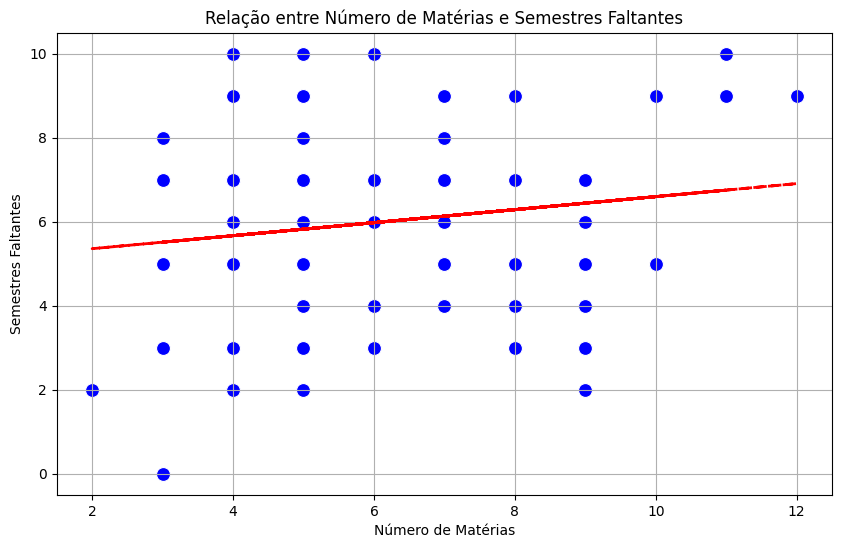

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

df = dados[['n_cadeiras', 'semestres_faltantes']].dropna()

# Calculando o coeficiente de correlação de Pearson
corr_coefficient, p_value = pearsonr(df['n_cadeiras'], df['semestres_faltantes'])
print(f'Coeficiente de Correlação de Pearson: {corr_coefficient:.2f}')
print(f'Valor-p: {p_value:.3f}')

# Definindo as variáveis independentes e dependentes
X = df['n_cadeiras']
y = df['semestres_faltantes']

# Adicionando uma constante para o modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Resumo do modelo
print(model.summary())

# Criando o gráfico de dispersão e a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_cadeiras', y='semestres_faltantes', data=df, color='blue', s=100)
plt.plot(df['n_cadeiras'], predictions, color='red', linestyle='--', linewidth=2)
plt.title('Relação entre Número de Matérias e Semestres Faltantes')
plt.xlabel('Número de Matérias')
plt.ylabel('Semestres Faltantes')
plt.grid(True)
plt.show()

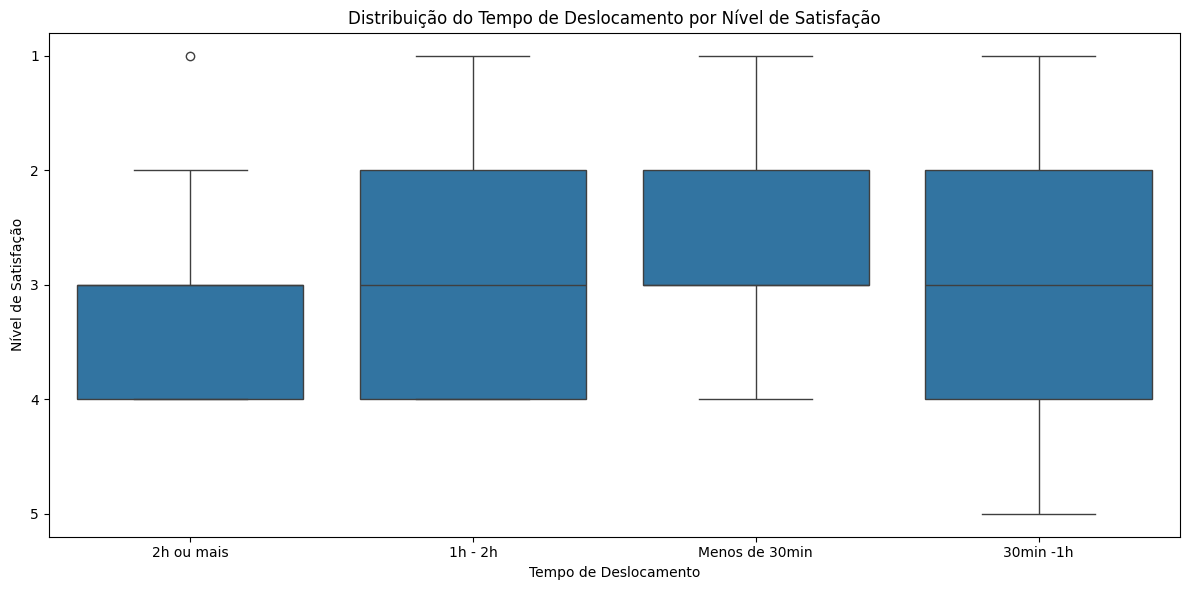

In [ ]:
dados['satisfacao'] = dados['satisfacao'].astype('category')
plt.figure(figsize=(12, 6))
sns.boxplot(x='t_deslocamento', y='satisfacao', data=dados)
plt.title('Distribuição do Tempo de Deslocamento por Nível de Satisfação')
plt.xlabel('Tempo de Deslocamento')
plt.ylabel('Nível de Satisfação')
plt.yticks(ticks=np.arange(1, 6), labels=np.arange(1, 6), fontsize=10)
plt.tight_layout()
plt.savefig('boxplot_anova.png')
plt.show()


In [ ]:
grupos = [dados[dados['t_deslocamento'] == categoria]['satisfacao'] for categoria in dados['t_deslocamento'].unique()]
f_statistic, p_value = stats.f_oneway(*grupos)
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')


F-statistic: 1.5884049702456124
P-value: 0.19707437758604793


**Interpretação**

F-statistic (1.588): A estatística F indica a razão entre a variabilidade entre os grupos e a variabilidade dentro dos grupos. Um valor de 1.588 sugere que a variabilidade entre os grupos é relativamente pequena em comparação com a variabilidade interna dos grupos.

P-value (0.197): O valor-p é a probabilidade de observar os dados ou algo mais extremo se a hipótese nula for verdadeira. Neste caso, o valor-p é 0.197, que é maior do que o nível de significância comum de 0,05.

**Conclusão**

Como o valor-p (0.197) é maior que 0,05, não há evidências suficientes para rejeitar a hipótese nula. Isso significa que
não há diferença estatisticamente significativa nos níveis de satisfação entre os diferentes tempos de deslocamento.